## Anomaly Detection
### Laboratory 4

### Ex. 1

In [1]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

In [4]:
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=0.15)

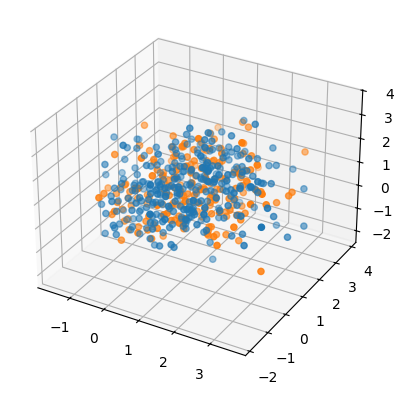

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2])
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2])

plt.show()

In [7]:
clf_ocsvm = OCSVM(kernel="linear", contamination=0.15)
clf_ocsvm.fit(X_train)
scores_ocsvm = clf_ocsvm.decision_function(X_test)
pred_ocsvm = clf_ocsvm.predict(X_test)
pred_train_ocsvm = clf_ocsvm.predict(X_train)

In [8]:
bal_acc_ocsvm = balanced_accuracy_score(y_test, pred_ocsvm)
roc_auc_ocsvm = roc_auc_score(y_test, scores_ocsvm)

print(f"Balanced accuracy score is {bal_acc_ocsvm}.")
print(f"ROC AUC Score is {roc_auc_ocsvm}.")

Balanced accuracy score is 0.7931372549019607.
ROC AUC Score is 0.9417647058823531.


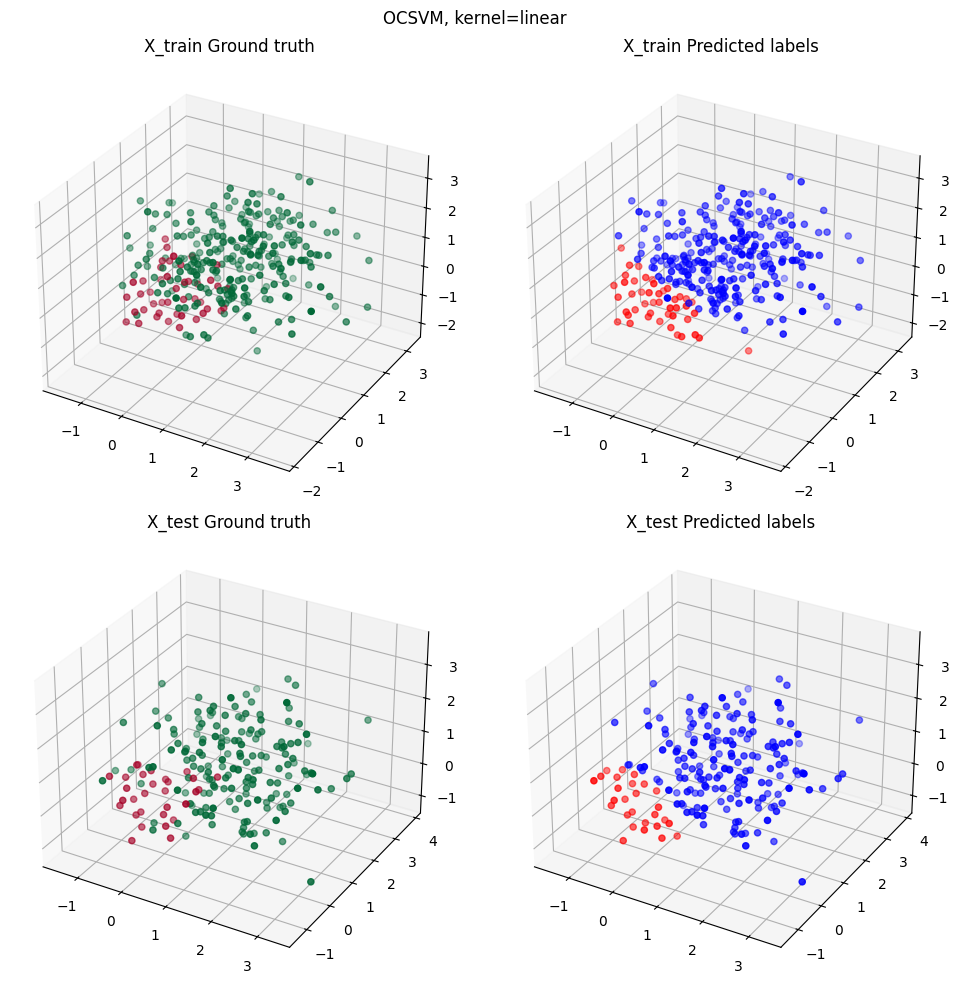

In [9]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("OCSVM, kernel=linear")

ax = fig.add_subplot(2, 2, 1, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap="RdYlGn_r")
ax.set_title("X_train Ground truth")

ax = fig.add_subplot(2, 2, 2, projection="3d")
ax.scatter(
    X_train[:, 0],
    X_train[:, 1],
    X_train[:, 2],
    c=pred_train_ocsvm,
    cmap="bwr"
)
ax.set_title("X_train Predicted labels")

ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    X_test[:, 2],
    c=y_test,
    cmap="RdYlGn_r",
)
ax.set_title("X_test Ground truth")

ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    X_test[:, 2],
    c=pred_ocsvm,
    cmap="bwr"
)
ax.set_title("X_test Predicted labels")

plt.tight_layout()
plt.show()

In [10]:
clf_ocsvm = OCSVM(kernel="rbf", contamination=0.15)
clf_ocsvm.fit(X_train)
scores_ocsvm = clf_ocsvm.decision_function(X_test)
pred_ocsvm = clf_ocsvm.predict(X_test)
pred_train_ocsvm = clf_ocsvm.predict(X_train)

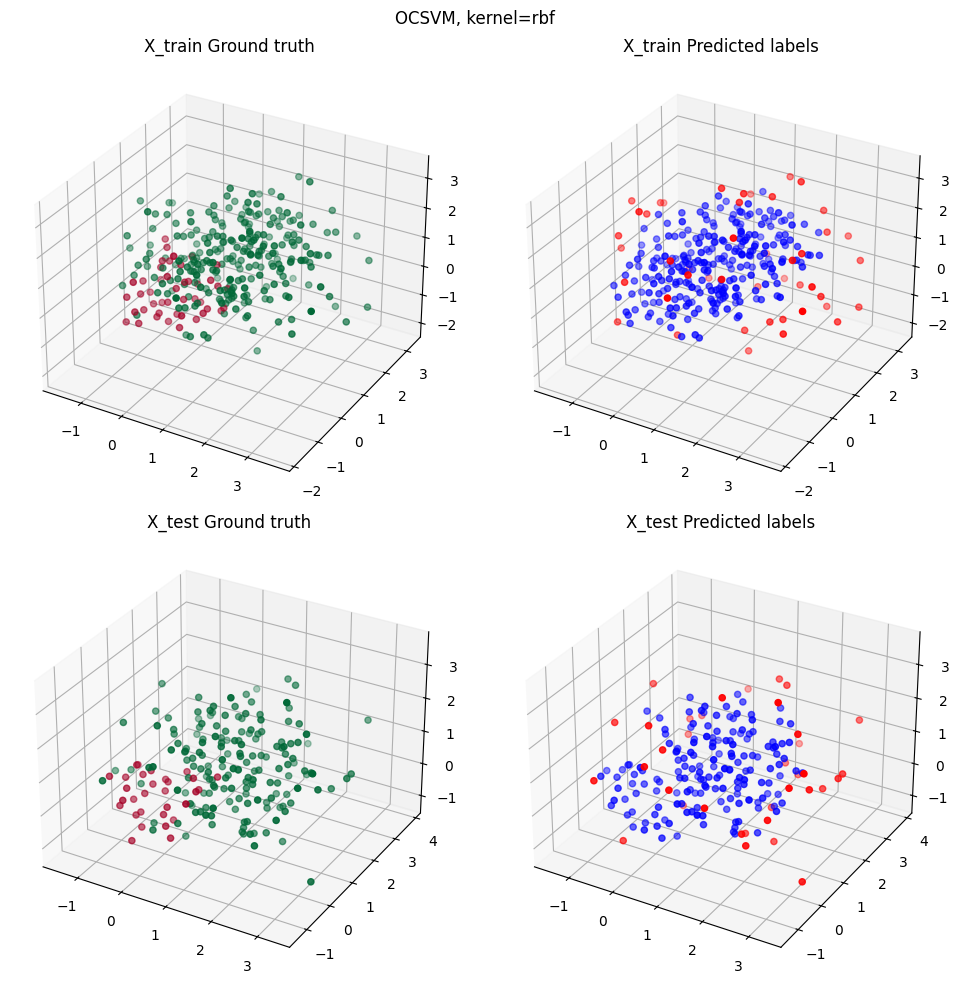

In [11]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("OCSVM, kernel=rbf")

ax = fig.add_subplot(2, 2, 1, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap="RdYlGn_r")
ax.set_title("X_train Ground truth")

ax = fig.add_subplot(2, 2, 2, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=pred_train_ocsvm, cmap="bwr")
ax.set_title("X_train Predicted labels")

ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    X_test[:, 2],
    c=y_test,
    cmap="RdYlGn_r",
)
ax.set_title("X_test Ground truth")

ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=pred_ocsvm, cmap="bwr")
ax.set_title("X_test Predicted labels")

plt.tight_layout()
plt.show()

In [12]:
from pyod.models.deep_svdd import DeepSVDD

In [13]:
clf_deepsvdd = DeepSVDD(n_features=3, contamination=0.15)
clf_deepsvdd.fit(X_train)
scores_deepsvdd = clf_deepsvdd.decision_function(X_test)
pred_deepsvdd = clf_deepsvdd.predict(X_test)
pred_train_deepsvdd = clf_deepsvdd.predict(X_train)

Epoch 1/100, Loss: 10.266524851322174
Epoch 2/100, Loss: 10.008078873157501
Epoch 3/100, Loss: 10.02941209077835
Epoch 4/100, Loss: 9.822957336902618
Epoch 5/100, Loss: 9.914130747318268
Epoch 6/100, Loss: 10.098156988620758
Epoch 7/100, Loss: 9.648591041564941
Epoch 8/100, Loss: 9.874812424182892
Epoch 9/100, Loss: 10.238203167915344
Epoch 10/100, Loss: 9.702139914035797
Epoch 11/100, Loss: 9.961855053901672
Epoch 12/100, Loss: 10.091833889484406
Epoch 13/100, Loss: 9.793484389781952
Epoch 14/100, Loss: 9.728958249092102
Epoch 15/100, Loss: 9.765657663345337
Epoch 16/100, Loss: 9.753080666065216
Epoch 17/100, Loss: 9.852128505706787
Epoch 18/100, Loss: 10.122079730033875
Epoch 19/100, Loss: 10.09578788280487
Epoch 20/100, Loss: 9.87050312757492
Epoch 21/100, Loss: 10.233612656593323
Epoch 22/100, Loss: 9.889303207397461
Epoch 23/100, Loss: 9.999815702438354
Epoch 24/100, Loss: 9.978396713733673
Epoch 25/100, Loss: 10.165395617485046
Epoch 26/100, Loss: 10.07092159986496
Epoch 27/100, 

In [14]:
bal_acc_deepsvdd = balanced_accuracy_score(y_test, pred_deepsvdd)
roc_auc_deepsvdd = roc_auc_score(y_test, scores_deepsvdd)

print(f"Balanced accuracy score is {bal_acc_deepsvdd}.")
print(f"ROC AUC Score is {roc_auc_deepsvdd}.")

Balanced accuracy score is 0.40588235294117647.
ROC AUC Score is 0.406078431372549.


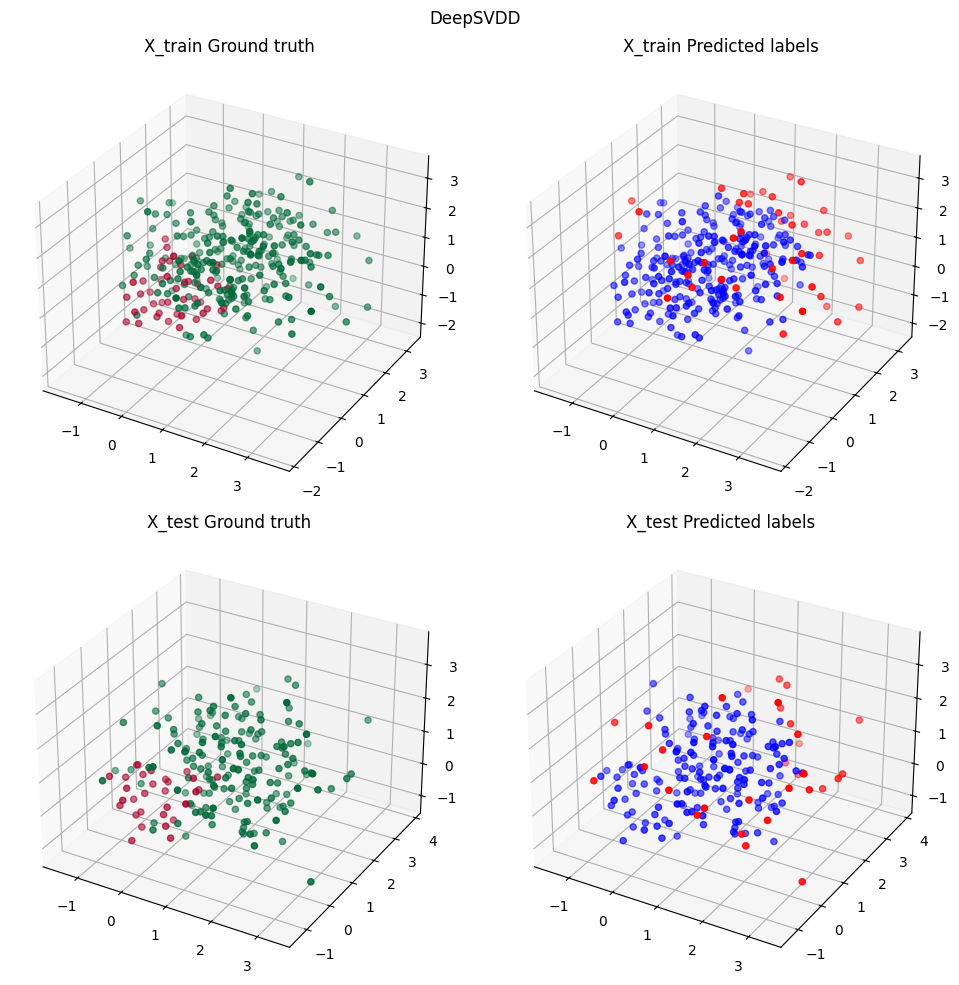

In [16]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("DeepSVDD")

ax = fig.add_subplot(2, 2, 1, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap="RdYlGn_r")
ax.set_title("X_train Ground truth")

ax = fig.add_subplot(2, 2, 2, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=pred_train_deepsvdd, cmap="bwr")
ax.set_title("X_train Predicted labels")

ax = fig.add_subplot(2, 2, 3, projection="3d")
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    X_test[:, 2],
    c=y_test,
    cmap="RdYlGn_r",
)
ax.set_title("X_test Ground truth")

ax = fig.add_subplot(2, 2, 4, projection="3d")
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=pred_deepsvdd, cmap="bwr")
ax.set_title("X_test Predicted labels")

plt.tight_layout()
plt.show()

### Ex. 2

In [47]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [49]:
data = loadmat("data/cardio.mat")
X = data["X"]
y = data["y"].ravel()
y = 1 - 2 * y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.4, random_state=42, shuffle=True
)

In [50]:
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    "ocsvm__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "ocsvm__gamma": ["scale", "auto", 0.01, 0.1, 1],
    "ocsvm__nu": [0.01, 0.05, 0.1, 0.15, 0.2],
}

In [52]:
pipeline = Pipeline([("scaler", StandardScaler()), ("ocsvm", OneClassSVM())])

In [53]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="balanced_accuracy"
)

In [54]:
grid.fit(X_train, y_train)

,estimator,Pipeline(step...eClassSVM())])
,param_grid,"{'ocsvm__gamma': ['scale', 'auto', ...], 'ocsvm__kernel': ['linear', 'poly', ...], 'ocsvm__nu': [0.01, 0.05, ...]}"
,scoring,'balanced_accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [55]:
best_model = grid.best_estimator_
best_model

,steps,"[('scaler', ...), ('ocsvm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0


In [56]:
y_pred = best_model.predict(X_test)

In [57]:
grid.best_params_

{'ocsvm__gamma': 0.01, 'ocsvm__kernel': 'rbf', 'ocsvm__nu': 0.2}

In [58]:
balanced_accuracy_score(y_test, y_pred)

0.8603981445689988

### Ex. 3

In [80]:
data = loadmat("data/shuttle.mat")
X = data["X"]
y = data["y"].ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, random_state=42, shuffle=True
)

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [82]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
clf_ocsvm = OCSVM(kernel="linear")
clf_ocsvm.fit(X_train)
scores_ocsvm = clf_ocsvm.decision_function(X_test)
pred_ocsvm = clf_ocsvm.predict(X_test)
pred_train_ocsvm = clf_ocsvm.predict(X_train)
bal_acc_ocsvm = balanced_accuracy_score(y_test, pred_ocsvm)
roc_auc_ocsvm = roc_auc_score(y_test, scores_ocsvm)

print(f"Balanced accuracy score is {bal_acc_ocsvm}.")
print(f"ROC AUC Score is {roc_auc_ocsvm}.")

Balanced accuracy score is 0.5873680005321553.
ROC AUC Score is 0.6795117676375981.


In [75]:
clf_deepsvdd = DeepSVDD(n_features=X_train.shape[1])
clf_deepsvdd.fit(X_train)
scores_deepsvdd = clf_deepsvdd.decision_function(X_test)
pred_deepsvdd = clf_deepsvdd.predict(X_test)
pred_train_deepsvdd = clf_deepsvdd.predict(X_train)
bal_acc_deepsvdd = balanced_accuracy_score(y_test, pred_deepsvdd)
roc_auc_deepsvdd = roc_auc_score(y_test, scores_deepsvdd)

print(f"Balanced accuracy score is {bal_acc_deepsvdd}.")
print(f"ROC AUC Score is {roc_auc_deepsvdd}.")

Epoch 1/100, Loss: 535.9486406445503
Epoch 2/100, Loss: 536.0721190720797
Epoch 3/100, Loss: 536.569792330265
Epoch 4/100, Loss: 536.1069967746735
Epoch 5/100, Loss: 535.9438593834639
Epoch 6/100, Loss: 536.1900630891323
Epoch 7/100, Loss: 536.9196168780327
Epoch 8/100, Loss: 535.8205434083939
Epoch 9/100, Loss: 535.8367264121771
Epoch 10/100, Loss: 535.8735782653093
Epoch 11/100, Loss: 535.8134251087904
Epoch 12/100, Loss: 536.2210209220648
Epoch 13/100, Loss: 535.9205689430237
Epoch 14/100, Loss: 536.1275396347046
Epoch 15/100, Loss: 535.8178427368402
Epoch 16/100, Loss: 536.1201675534248
Epoch 17/100, Loss: 536.3910294175148
Epoch 18/100, Loss: 535.7982532233
Epoch 19/100, Loss: 536.6952119618654
Epoch 20/100, Loss: 535.7879228666425
Epoch 21/100, Loss: 536.8875814974308
Epoch 22/100, Loss: 536.1261481791735
Epoch 23/100, Loss: 535.8128388077021
Epoch 24/100, Loss: 536.0838863402605
Epoch 25/100, Loss: 536.5213358402252
Epoch 26/100, Loss: 535.9775184690952
Epoch 27/100, Loss: 535.7

In [72]:
deepsvdd_architectures = [
    [32, 16],
    [64, 32],
    [128, 64, 32],
]

In [73]:
res = []

In [77]:
for architecture in deepsvdd_architectures:
    model = DeepSVDD(
        n_features=X_train.shape[1],
        hidden_neurons=architecture
    )
    model.fit(X_train)

    y_scores = model.decision_function(X_test)
    y_pred = model.predict(X_test)

    ba = balanced_accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_scores)

    res.append((architecture, ba, roc))

Epoch 1/100, Loss: 320.59029749035835
Epoch 2/100, Loss: 320.48099736124277
Epoch 3/100, Loss: 320.47896307706833
Epoch 4/100, Loss: 320.5856183692813
Epoch 5/100, Loss: 320.55806992203
Epoch 6/100, Loss: 321.0050680488348
Epoch 7/100, Loss: 320.47233840823174
Epoch 8/100, Loss: 321.16449742019176
Epoch 9/100, Loss: 320.3854689896107
Epoch 10/100, Loss: 321.5697946548462
Epoch 11/100, Loss: 320.5034032315016
Epoch 12/100, Loss: 320.4600019752979
Epoch 13/100, Loss: 321.46569169312716
Epoch 14/100, Loss: 320.3810040950775
Epoch 15/100, Loss: 320.4500021636486
Epoch 16/100, Loss: 321.1658612936735
Epoch 17/100, Loss: 320.7616173028946
Epoch 18/100, Loss: 320.7137459293008
Epoch 19/100, Loss: 320.4772979840636
Epoch 20/100, Loss: 320.3412441946566
Epoch 21/100, Loss: 320.5573525503278
Epoch 22/100, Loss: 320.47817216068506
Epoch 23/100, Loss: 320.71671921014786
Epoch 24/100, Loss: 321.1006956845522
Epoch 25/100, Loss: 320.3413472287357
Epoch 26/100, Loss: 323.0128653123975
Epoch 27/100, L

In [79]:
for architecture, bal_acc, roc_auc in res:
    print(f"{architecture}, BA={bal_acc}, ROC AUC={roc_auc}")

[32, 16], BA=0.9666975452823372, ROC AUC=0.9891927112860773
[64, 32], BA=0.9704260341879567, ROC AUC=0.9913322428180447
[128, 64, 32], BA=0.955229975765767, ROC AUC=0.9812392567362247
